In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.plotting import plot

In [85]:
alpha=1

# high alpha makes derivative zero.. no weight update possible

def sigmoidFunction(x):
    return 1/(1+np.exp(-alpha*x))

def sigmoidFunction2(x):
    return  np.tanh((alpha*x)/2)

def derivationSigmoidFunction(x):
    return alpha*sp.exp(-alpha*x)/(1 + sp.exp(-alpha*x))**2

def derivationSigmoidFunction2(x):
    return -(alpha/2)*np.tanh((alpha/2)*x)**2 + (alpha/2)


def setWeightMatrix(MLVector):
    weightMatrix=np.zeros((np.max(MLVector)**2, np.shape(MLVector)[0]-1))
    for i in range(np.shape(MLVector)[0]):
        if(i+1<np.shape(MLVector)[0]):
            b=0;
            for j in range(MLVector.item(i)):
                for z in range(MLVector.item(i+1)):
                    a=initialWeight(1)
                    weightMatrix[b,i]= a
                    b=b+1
    return weightMatrix


def initialWeight(setting):
    if(setting==1):
        return np.random.randint(1,5)
    return 0

def getLocalField(MLVector, weightMatrix, inputX, outputY,bias):
    
    if(MLVector.item(0)<np.shape(inputX)[0]):
        print(" input vector x to big vor NN")
        print(inputX)
        return 0
    if(MLVector.item(0)>np.shape(inputX)[0]):
        print(" input vector x to small vor NN")
        return 0
    else:
        
        localField=np.zeros((np.max(MLVector), np.shape(MLVector)[0]-1))
        
        for i in range(MLVector.item(0)):
            outputY[i,0]=inputX.item(i)
       
        
        for i in range(1, np.shape(MLVector)[0]):
            a=0;
            for j in range(MLVector.item(i-1)):
                
                for z in range(MLVector.item(i)):
                    localField[z,i-1]= localField[z,i-1] + ((outputY[j,i-1])* weightMatrix[a,i-1])
                    a=a+1
                    
            
            for j in range(MLVector.item(i)):
                localField[j,i-1]= localField[j,i-1] +bias[j,i-1]
                outputY[j,i]=sigmoidFunction2(localField[j,i-1])
        return localField
    
    
def backProp( MLVector, localField, weightMatrix, outputY, desiredOutput, learningRate):
    
    delta=np.zeros((np.max(MLVector), np.shape(MLVector)[0]-1))
    a=0;
    for i in range(MLVector.item(np.shape(MLVector)[0]-1)):            

        for j in range(MLVector.item(np.shape(MLVector)[0]-2)):
            #print("i",i)
            y=outputY[i,np.shape(MLVector)[0]-1]
            #print("output:",y)
            delta[j,np.shape(MLVector)[0]-2]=-((alpha/2)*(1-y**2))*(desiredOutput[i]-y)
            #Wikipedia : y-d
            #print("delta matrix :")
            #print(delta)
            #print("j",j)
            #print("input in node j",outputY[j,np.shape(MLVector)[0]-2])
            #print("delta j",delta[i,np.shape(MLVector)[0]-2])
            #print("weight vor änderung",weightMatrix[a,np.shape(MLVector)[0]-2])
            weightMatrix[a,np.shape(MLVector)[0]-2]=weightMatrix[a,np.shape(MLVector)[0]-2]- (learningRate*delta[i,np.shape(MLVector)[0]-2]*outputY[j,np.shape(MLVector)[0]-2])
            #print("weight nach änderung",weightMatrix[a,np.shape(MLVector)[0]-2])
            a=a+1
            
    for i in reversed(range(np.shape(MLVector)[0]-2)):
        a=0
        pos=0
        for j in range(MLVector.item(i)):
            mulDeltaWeights=0;
           
            for y in range(MLVector.item(i+1)):
                #print("delta:",delta[y,i+1])
                mulDeltaWeights=mulDeltaWeights+ (delta[y,i+1]* weightMatrix[a,i])
                a=a+1
            delta[j,i]=-((alpha/2)*(1-outputY[j,i+1]**2))*mulDeltaWeights

                
            for y in range(MLVector.item(i+1)):
                weightMatrix[pos,i]=weightMatrix[pos,i]- (learningRate*delta[j,i]*outputY[y,i])
                #print("ÄNDERUNG hidden layer",(learningRate*delta[j,i]*outputY[y,i]))
                pos=pos+1
               

initial weight matrix:
[[ 3.  3.]
 [ 4.  4.]
 [ 1.  0.]
 [ 1.  0.]]
 weight matrix after training 10000 times with learning rate 0.2:
[[ -12.40643035    0.14212582]
 [ 119.64238063    0.71799163]
 [   0.94097724    0.        ]
 [   1.26507172    0.        ]]


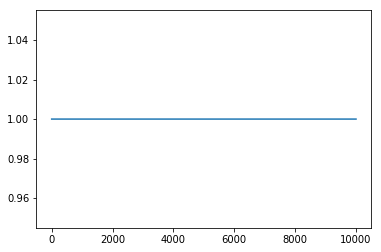

In [87]:
MLVector=np.array([[2],[2],[1]])
learningRate=0.2
weightMatrix=setWeightMatrix(MLVector)

#weightMatrix=np.array([[ 1, 1],[ -1 , 0.9],[ -1 , 0.],[ 1 , 0.]])
bias=np.array([[ -1, 0.1 ],[   -1  , 0 ],[   -1  , 0 ]])
#bias=np.array([[ 0, 0 ,0,0,0],[  0, 0 ,0,0,0 ],[  0, 0 ,0,0,0 ]])

print("initial weight matrix:")
print(weightMatrix)
inputX= np.array([[-1,1],[1,-1],[-1,-1],[1,1]])
desiredOutput= np.array([[1],[1],[-1],[-1]])

error=np.zeros(( 10000))

j=0
for i in range(0,10000):

    y=np.random.randint(0,4)
    outputY=np.zeros((np.max(MLVector), np.shape(MLVector)[0]))
    localField = getLocalField(MLVector, weightMatrix, inputX[y], outputY,bias)
    #print("ITERATION", i)
    #print("outp: ")
    #print(outputY)
    #print("local Field: ")
    #print(localField)
    backProp(MLVector, localField, weightMatrix,  outputY, desiredOutput[y], learningRate)
    #print("weightMatrix")
    #print(weightMatrix)
    
    for j in range(0,4):
        outputY=np.zeros((np.max(MLVector), np.shape(MLVector)[0]))
        localField = getLocalField(MLVector, weightMatrix, inputX[j], outputY,bias)
        if(desiredOutput[j]!=outputY[0,2]):
            error[i]= error[i]+1
        
        
    error[i]= error[i]/4
        

print(" weight matrix after training 10000 times with learning rate 0.2:")
print(weightMatrix)    

plt.plot(error)
plt.show()


initial weight matrix:
[[ 1.  2.]
 [ 2.  4.]
 [ 1.  0.]
 [ 3.  0.]]
 weight matrix after training 10000 times with learning rate 0.:
[[ 1.  2.]
 [ 2.  4.]
 [ 1.  0.]
 [ 3.  0.]]


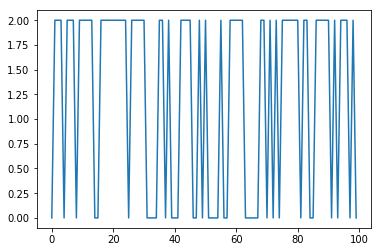

In [80]:

learningRate=0.5
weightMatrix=setWeightMatrix(MLVector)

print("initial weight matrix:")
print(weightMatrix)

error=np.zeros(( 100))

j=0
for i in range(0,10000):

    y=np.random.randint(0,4)
    outputY=np.zeros((np.max(MLVector), np.shape(MLVector)[0]))
    localField = getLocalField(MLVector, weightMatrix, inputX[y], outputY,bias)
   # print("outp: ",outputY)
   # print("local Field: ", localField)
    backProp(MLVector, localField, weightMatrix,  outputY, desiredOutput[y], learningRate)
    if(np.mod(i,100)==0):
        error[j]=(1/2) *(desiredOutput[y]-outputY[0,2])**2
        j=j+1

print(" weight matrix after training 10000 times with learning rate 0.:")
print(weightMatrix)    

plt.plot(error)
plt.show()


initial weight matrix:
[[ 2.  1.]
 [ 3.  2.]
 [ 2.  0.]
 [ 2.  0.]]
 weight matrix after training 10000 times with learning rate 0.9:
[[ 3.0847784   7.19175192]
 [ 3.01924121  8.19175192]
 [ 3.0847784   0.        ]
 [ 2.01924121  0.        ]]


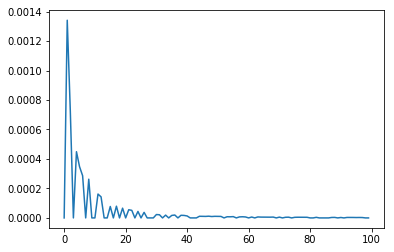

In [244]:

learningRate=0.9
weightMatrix=setWeightMatrix(MLVector)


print("initial weight matrix:")
print(weightMatrix)


error=np.zeros(( 100))

j=0
for i in range(0,10000):

    y=np.random.randint(0,3)
    outputY=np.zeros((np.max(MLVector), np.shape(MLVector)[0]))
    localField = getLocalField(MLVector, weightMatrix, inputX[y], outputY,bias)
   # print("outp: ",outputY)
   # print("local Field: ", localField)
    backProp(MLVector, localField, weightMatrix,  outputY, desiredOutput[y], learningRate)
    if(np.mod(i,100)==0):
        error[j]=(1/2) *(desiredOutput[y]-outputY[0,2])**2
        j=j+1

print(" weight matrix after training 10000 times with learning rate 0.9:")
print(weightMatrix)    

plt.plot(error)
plt.show()


In [298]:
sigmoidFunction2(-1)

-1.0

In [287]:
-np.sqrt(2)/2

-0.70710678118654757

0.99778515785660893

In [28]:
x=sp.symbols("x")
h= sp.tanh((alpha*x)/2)

a=sp.diff(h)
b=(alpha/2)*(1-(sp.tanh((alpha*x)/2))**2)
x=-1

a

-tanh(x/2)**2/2 + 1/2

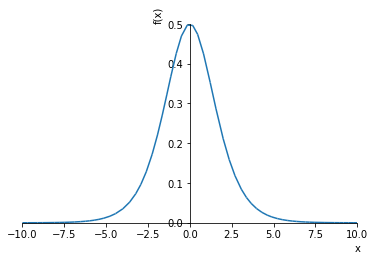

In [29]:
plot(a)

In [30]:
derivationSigmoidFunction2(-1)

0.3932238664829637

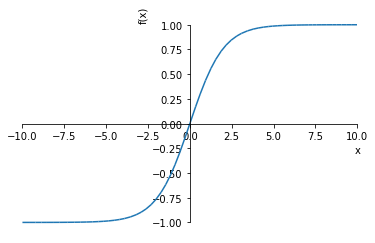

In [31]:
plot(h)